# Introduction to dMRI Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

Diffusion imaging probes the random, microscopic motion of water protons by employing MRI sequences which are sensitive to the geometry and environmental organization surrounding the water protons.
This is a popular technique for studying the white matter of the brain.
The diffusion within biological structures, such as the brain, are often restricted due to barriers (eg. cell membranes), resulting in a preferred direction of diffusion (anisotropy).
A typical dMRI scan will acquire multiple volumes that are sensitive to a particular diffusion direction.

## Diffusion Gradient Schemes

In addition to the acquired diffusion images, two files are collected as part of the diffusion dataset.
These files correspond to the gradient amplitude (b-values) and directions (b-vectors) of the diffusion measurement and are named with the extensions `.bval` and `.bvec` respectively.

In [2]:
dwi = "../../data/sub-01_dwi.nii.gz"
bvec = "../../data/sub-01_dwi.bvec"
bval = "../../data/sub-01_dwi.bval"

The b-value is the diffusion-sensitizing factor, and reflects the timing & strength of the gradients (measured in s/mm2) used to acquire the diffusion-weighted images.

In [3]:
!cat ../../data/sub-01_dwi.bval

0 0 0 0 0 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000


The b-vector corresponds to the direction of the diffusion sensitivity. Each row corresponds to a value in the x, y, or z axis. The numbers are combined column-wise to get an [x y z] coordinate per DWI volume.

In [4]:
!cat ../../data/sub-01_dwi.bvec

0 0 0 0 0 -1 -0.361 0.255 -0.861 0.307 0.736 -0.532 -0.177 -0.771 -0.079 -0.109 -0.302 0.464 0.464 0.529 0.825 -0.697 -0.479 0.213 0.648 -0.58 0.729 -0.963 -0.229 0.016 -0.359 -0.806 0.045 0.177 -0.946 0.318 0.312 0.284 0.421 0.963 0.881 -0.758 0.684 -0.932 0.648 -0.773 -0.276 0.555 -0.007 -0.919 0.223 0.544 -0.867 -0.534 0.001 0.611 -0.691 -0.731 -0.024 -0.453 -0.432 0.87 -0.283 -0.088 0.016
0 0 0 0 0 0 0.933 0.565 -0.464 -0.766 0.013 0.343 0.965 0.163 -0.996 -0.92 -0.779 -0.46 0.839 0.014 -0.54 -0.287 -0.338 -0.851 0.736 0.745 0.197 -0.264 0.507 0.171 -0.932 -0.422 0.087 0.841 0.315 0.257 0.165 -0.2 -0.093 -0.02 0.161 -0.45 0.72 0.229 -0.252 0.61 -0.533 0.591 0.715 -0.07 -0.589 -0.73 -0.477 -0.554 0.726 -0.791 0.503 0.475 -0.38 0.646 -0.82 -0.289 0.912 0.393 -0.964
0 0 0 0 0 0 0 0.785 0.21 0.564 0.677 0.774 0.195 0.615 -0.036 -0.376 -0.549 0.757 0.284 -0.849 -0.167 -0.657 -0.81 -0.48 -0.195 0.33 -0.656 0.054 0.831 -0.985 0.051 -0.415 0.995 -0.511 -0.068 -0.912 0.936 -0.938 0.902 0.27

Together these two files define the dMRI measurement as a set of gradient directions and corresponding amplitudes.

In the example data above, we see that 2 b-values were chosen for this scanning sequence.
The first few images were acquired with a b-value of 0 and are typically referred to as b=0 images.
In these images, no diffusion gradient is applied.
These images don't hold any diffusion information and are used as a reference (head motion correction) since they aren't subject to the same types of scanner artifacts that affect diffusion-weighted images.

All of the remaining images have a b-value of 1000 and have a diffusion gradient associated with them.
Diffusion that exhibits directionality in the same direction as the gradient result in a loss of signal.
With further processing, the acquired images can provide measurements which are related to the microscopic changes and estimate white matter trajectories.

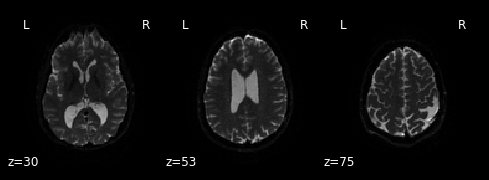

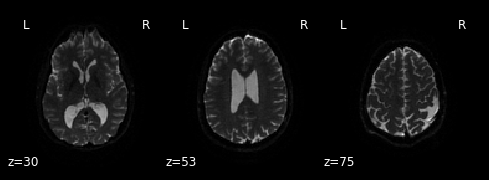

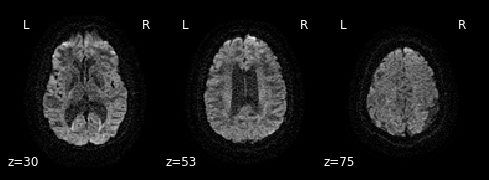

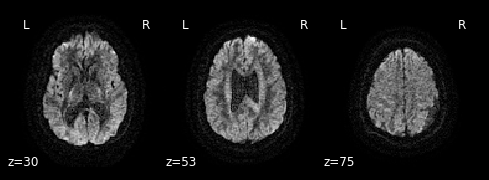

In [5]:
%matplotlib inline

from nilearn import image
from nilearn.plotting import plot_epi

selected_volumes = image.index_img(dwi, slice(3, 7))

for img in image.iter_img(selected_volumes):
    plot_epi(img, display_mode="z", cut_coords=(30, 53, 75), cmap="gray")

After reading the `.bval` and `.bvec` files with the `read_bvals_bvecs()` function, we get both in a numpy array. Notice that the `.bvec` file has been transposed so that the x, y, and z-components are in column format.

In [6]:
from dipy.io import read_bvals_bvecs

gt_bvals, gt_bvecs = read_bvals_bvecs(bval, bvec)
gt_bvecs

array([[ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ],
       [-1.   ,  0.   ,  0.   ],
       [-0.361,  0.933,  0.   ],
       [ 0.255,  0.565,  0.785],
       [-0.861, -0.464,  0.21 ],
       [ 0.307, -0.766,  0.564],
       [ 0.736,  0.013,  0.677],
       [-0.532,  0.343,  0.774],
       [-0.177,  0.965,  0.195],
       [-0.771,  0.163,  0.615],
       [-0.079, -0.996, -0.036],
       [-0.109, -0.92 , -0.376],
       [-0.302, -0.779, -0.549],
       [ 0.464, -0.46 ,  0.757],
       [ 0.464,  0.839,  0.284],
       [ 0.529,  0.014, -0.849],
       [ 0.825, -0.54 , -0.167],
       [-0.697, -0.287, -0.657],
       [-0.479, -0.338, -0.81 ],
       [ 0.213, -0.851, -0.48 ],
       [ 0.648,  0.736, -0.195],
       [-0.58 ,  0.745,  0.33 ],
       [ 0.729,  0.197, -0.656],
       [-0.963, -0.264,  0.054],
       [-0.229,  0.507,  0.831],
       [ 0.016,  0.171, -0.985],
       [-0

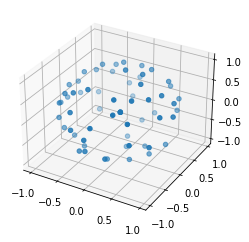

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(gt_bvecs.T[0], gt_bvecs.T[1], gt_bvecs.T[2])
plt.show()

It is important to note that in this format, the diffusion gradients are provided with respect to the image axes, not in real or scanner coordinates. Simply reformatting the image from sagittal to axial will effectively rotate the b-vectors, since this operation changes the image axes. Thus, a particular bvals/bvecs pair is only valid for the particular image that it corresponds to.

## Diffusion Gradient Operations

Because the diffusion gradient is critical for later analyzing the data, dMRIPrep performs several checks to ensure that the information is stored correctly.
### BIDS Validator

At the beginning of the pipeline, the BIDS Validator is run.
This package ensures that the data is BIDS-compliant and also has several dMRI-specific checks summarized below:

- all dMRI scans have a corresponding `.bvec` and `.bval` file
- the files aren't empty and formatted correctly
  - single space delimited
  - only contain numeric values
  - correct number of rows and volume information
  - volume information matches between image, `.bvec` and `.bval` files

### DiffusionGradientTable

In dMRIPrep, the `DiffusionGradientTable` class is used to read in the `.bvec` and `.bval` files, perform further sanity checks and make any corrections if needed.

In [8]:
from dmriprep.utils.vectors import DiffusionGradientTable

dwi = "../../data/sub-02_dwi.nii.gz"
bvec = "../../data/sub-02_dwi.bvec"
bval = "../../data/sub-02_dwi.bval"

gt_bvals, gt_bvecs = read_bvals_bvecs(bval, bvec)

gtab = DiffusionGradientTable(dwi_file=dwi, bvecs=bvec, bvals=bval)

Inconsistent bvals and bvecs (13, 0 low-b, respectively).


Below is a comparison of the `.bvec` and `.bval` files as read originally using `dipy` and after being corrected using `DiffusionGradientTable`.

In [9]:
gt_bvals

array([   5.,    5.,  610., 1240.,  615., 1225.,  625., 1230.,  620.,
       1230.,  610., 1240.,  615., 1225.,  620., 1220.,  620.,    5.,
       1225.,  615., 1240.,  625., 1230.,  620., 1240.,  615., 1225.,
        615., 1230.,  625., 1230.,  610., 1230.,    5.,  615., 1235.,
        615., 1220.,  625., 1245.,  620., 1240.,  620., 1225.,  615.,
       1235.,  620., 1225.,  605.,    5., 1225.,  625., 1235.,  615.,
       1230.,  620., 1230.,  610., 1235.,  620., 1230.,  620., 1220.,
        625., 1235.,    5.,  610., 1230.,  620., 1240.,  615., 1230.,
        625., 1230.,  610., 1235.,  610., 1240.,  620., 1235.,  620.,
          5., 1220.,  615., 1230.,  615., 1230.,  620., 1240.,  610.,
       1215.,  620., 1240.,  620., 1225.,  620., 1225.,  615., 1230.,
          5.,  890., 1800.,  895., 1785.,  910., 1790.,  900., 1795.,
        890., 1800.,  895., 1785.,  905., 1780.,  900.,    5., 1785.,
        895., 1805.,  905., 1795.,  900., 1800.,  895., 1780.,  895.,
       1790.,  905.,

It looks like this data has 5 unique b-values: 0, 600, 900, 1200 and 1800.
However, the actual values that are reported look slightly different.

In [10]:
from collections import Counter
Counter(sorted(gt_bvals))

Counter({5.0: 13,
         605.0: 1,
         610.0: 8,
         615.0: 13,
         620.0: 17,
         625.0: 7,
         885.0: 1,
         890.0: 8,
         895.0: 13,
         900.0: 15,
         905.0: 7,
         910.0: 2,
         1215.0: 1,
         1220.0: 4,
         1225.0: 9,
         1230.0: 15,
         1235.0: 7,
         1240.0: 9,
         1245.0: 1,
         1775.0: 2,
         1780.0: 4,
         1785.0: 8,
         1790.0: 12,
         1795.0: 9,
         1800.0: 5,
         1805.0: 6})

dMRIPrep does a bit of rounding internally to cluster the b-values into shells.

In [11]:
gtab.bvals

array([   0,    0,  600, 1200,  600, 1200,  600, 1200,  600, 1200,  600,
       1200,  600, 1200,  600, 1200,  600,    0, 1200,  600, 1200,  600,
       1200,  600, 1200,  600, 1200,  600, 1200,  600, 1200,  600, 1200,
          0,  600, 1200,  600, 1200,  600, 1200,  600, 1200,  600, 1200,
        600, 1200,  600, 1200,  600,    0, 1200,  600, 1200,  600, 1200,
        600, 1200,  600, 1200,  600, 1200,  600, 1200,  600, 1200,    0,
        600, 1200,  600, 1200,  600, 1200,  600, 1200,  600, 1200,  600,
       1200,  600, 1200,  600,    0, 1200,  600, 1200,  600, 1200,  600,
       1200,  600, 1200,  600, 1200,  600, 1200,  600, 1200,  600, 1200,
          0,  900, 1800,  900, 1800,  900, 1800,  900, 1800,  900, 1800,
        900, 1800,  900, 1800,  900,    0, 1800,  900, 1800,  900, 1800,
        900, 1800,  900, 1800,  900, 1800,  900, 1800,  900, 1800,    0,
        900, 1800,  900, 1800,  900, 1800,  900, 1800,  900, 1800,  900,
       1800,  900, 1800,  900,    0, 1800,  900, 18

In [12]:
gt_bvecs[0:20]

array([[ 0.531695  ,  0.58283   ,  0.6145    ],
       [ 0.531695  ,  0.58283   ,  0.6145    ],
       [-0.545977  ,  0.121865  , -0.82889   ],
       [ 0.483628  ,  0.854567  , -0.189258  ],
       [ 0.691191  , -0.512577  , -0.509432  ],
       [-0.105459  ,  0.288723  ,  0.951587  ],
       [-0.294575  , -0.941474  ,  0.163865  ],
       [-0.867939  ,  0.445659  , -0.219247  ],
       [-0.957356  , -0.288893  ,  0.00330035],
       [ 0.14789   , -0.594316  ,  0.790517  ],
       [ 0.296586  ,  0.26337   , -0.917972  ],
       [-0.263343  ,  0.886353  ,  0.380827  ],
       [-0.167652  , -0.748207  , -0.641933  ],
       [-0.81816   , -0.384613  , -0.427418  ],
       [ 0.568106  , -0.770115  ,  0.290135  ],
       [ 0.825166  ,  0.0628862 , -0.561379  ],
       [-0.707535  , -0.472155  ,  0.525798  ],
       [ 0.531695  ,  0.58283   ,  0.6145    ],
       [ 0.491263  ,  0.0442891 ,  0.869885  ],
       [-0.697671  , -0.447981  , -0.559078  ]])

It also replaces the b-vecs where a b-value of 0 is expected.

In [13]:
gtab.bvecs[0:20]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ],
       [-0.5459769 ,  0.12186497, -0.82888985],
       [ 0.48362815,  0.8545672 , -0.18925805],
       [ 0.6911906 , -0.5125767 , -0.5094317 ],
       [-0.10545897,  0.28872293,  0.9515868 ],
       [-0.2945751 , -0.9414743 ,  0.16386504],
       [-0.8679393 ,  0.44565916, -0.21924707],
       [-0.95735574, -0.28889295,  0.00330035],
       [ 0.14789   , -0.594316  ,  0.790517  ],
       [ 0.29658607,  0.26337007, -0.9179722 ],
       [-0.26334298,  0.8863529 ,  0.38082695],
       [-0.1676521 , -0.7482074 , -0.6419334 ],
       [-0.8181604 , -0.3846132 , -0.4274182 ],
       [ 0.56810606, -0.7701151 ,  0.29013503],
       [ 0.82516605,  0.06288621, -0.5613791 ],
       [-0.70753515, -0.4721551 ,  0.52579814],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.49126282,  0.04428909,  0.8698847 ],
       [-0.697671  , -0.447981  , -0.559078  ]], dtype=float32)

Inspired by MRtrix3 and proposed in the [BIDS spec](https://github.com/bids-standard/bids-specification/issues/349), dMRIPrep also creates an optional `.tsv` file where the diffusion gradients are reported in scanner coordinates as opposed to image coordinates.
The [x y z] values reported earlier are recalculated in [R A S].

In [14]:
gtab.gradients[0:20]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-5.45976823e-01,  1.21864955e-01, -8.28889764e-01,
         6.00000000e+02],
       [ 4.83628165e-01,  8.54567250e-01, -1.89258058e-01,
         1.20000000e+03],
       [ 6.91190602e-01, -5.12576700e-01, -5.09431721e-01,
         6.00000000e+02],
       [-1.05458978e-01,  2.88722942e-01,  9.51586815e-01,
         1.20000000e+03],
       [-2.94575076e-01, -9.41474256e-01,  1.63865034e-01,
         6.00000000e+02],
       [-8.67939301e-01,  4.45659164e-01, -2.19247075e-01,
         1.20000000e+03],
       [-9.57355719e-01, -2.88892949e-01,  3.30034916e-03,
         6.00000000e+02],
       [ 1.47889998e-01, -5.94315991e-01,  7.90516952e-01,
         1.20000000e+03],
       [ 2.96586058e-01,  2.63370059e-01, -9.17972180e-01,
         6.00000000e+02],
       [-2.63342957e-01,  8.86352832e-01,  3.80826922e-01,
      

Why is this important?

Below is an example of how improperly encoded bvecs can affect tractography.
![incorrect_bvecs](../images/incorrect_bvecs.png)

`MRtrix3` has actually created a handy tool called `dwigradcheck` to confirm whether the diffusion gradient table is oriented correctly.

```
$ dwigradcheck -fslgrad ../../data/sub-02_dwi.bvec ../../data/sub-02_dwi.bval ../../data/sub-02_dwi.nii.gz

> Mean length     Axis flipped    Axis permutations    Axis basis
52.41         none                (0, 1, 2)           image
51.68         none                (0, 1, 2)           scanner
32.70            1                (0, 1, 2)           image
32.25            1                (0, 1, 2)           scanner
31.23            0                (0, 2, 1)           scanner
30.97            2                (0, 1, 2)           scanner
30.82            0                (0, 2, 1)           image
29.41            2                (0, 1, 2)           image
29.31         none                (0, 2, 1)           image
28.61         none                (1, 0, 2)           image
28.57            2                (1, 0, 2)           scanner
28.46         none                (0, 2, 1)           scanner
28.41         none                (2, 1, 0)           scanner
28.40         none                (1, 0, 2)           scanner
28.14            0                (0, 1, 2)           scanner
28.04         none                (2, 1, 0)           image
27.92            1                (2, 1, 0)           image
27.80            1                (2, 1, 0)           scanner
27.71            2                (1, 0, 2)           image
27.54            0                (0, 1, 2)           image
23.43            1                (0, 2, 1)           image
22.86            1                (0, 2, 1)           scanner
21.55            2                (0, 2, 1)           scanner
21.44            0                (1, 2, 0)           scanner
21.35            2                (0, 2, 1)           image
21.03            1                (1, 0, 2)           image
20.88            0                (1, 0, 2)           image
20.87            1                (1, 2, 0)           image
20.80            0                (2, 0, 1)           scanner
20.74            0                (1, 0, 2)           scanner
20.41            2                (2, 0, 1)           scanner
20.38            1                (1, 0, 2)           scanner
20.25            0                (2, 1, 0)           image
20.24            0                (1, 2, 0)           image
20.21            1                (1, 2, 0)           scanner
20.15            1                (2, 0, 1)           image
20.13            2                (1, 2, 0)           scanner
20.11            2                (2, 0, 1)           image
20.04            1                (2, 0, 1)           scanner
19.94            0                (2, 0, 1)           image
19.87         none                (2, 0, 1)           scanner
19.86         none                (2, 0, 1)           image
19.83            2                (2, 1, 0)           scanner
19.72            2                (1, 2, 0)           image
19.59         none                (1, 2, 0)           image
19.49            0                (2, 1, 0)           scanner
19.45            2                (2, 1, 0)           image
19.43         none                (1, 2, 0)           scanner
```